# OpSim plots

In [1]:
import pandas as pd
import numpy as np
from astropy import units
from astropy.coordinates import SkyCoord

import matplotlib
import matplotlib.pyplot as plt
#from jupyterthemes import jtplot
#jtplot.reset()

import cartopy.crs as ccrs

import sys
sys.path.insert(0, '/Users/ageller/WORK/LSST/onGitHub/EBLSST/code')
from OpSim import OpSim

%matplotlib inline

In [26]:
#I want to show the RA with the origin at the side, so that the plots look like the figures here http://astro-lsst-01.astro.washington.edu:8080/allMetricResults?runId=1
#this requires me to use cartopy, which doesn't label the axes, so I have to go through a LOT of trouble to add axes labels!
#but this appears to work well enough, despite a few "magic numbers"
def makeMollweideAxes():    
    #set up the projections
    proj = ccrs.Mollweide(central_longitude=180)
    data_proj = ccrs.PlateCarree()#ccrs.Geodetic()

    #create the plot
    f,ax = plt.subplots(figsize=(8, 5), subplot_kw={'projection':proj})
    ax.set_global()

    #for the labels
    xlocs = np.linspace(-180, 180, 13)
    ylocs = np.linspace(-90, 90, 13)
    ax.gridlines(xlocs=xlocs, ylocs=ylocs)

    #labels
    plt.gcf().text(0.51, 0.15, 'RA', fontsize=16, horizontalalignment='center')
    plt.gcf().text(0.045, 0.5, 'Dec', fontsize=16, rotation=90, verticalalignment='center')
    for x in xlocs[1:-1]:
        l = r'$'+str(int(x))+'^\degree$'
        #plt.gcf().text(x/360. + 0.04 , 0.51, l, fontsize=12, horizontalalignment='center')
        ax.text(x, 1, l, fontsize=12, horizontalalignment='center', transform=data_proj)

    #it seems like there should be a better way to do this!
    bbox = ax.dataLim
    for y in ylocs[1:-1]:
        loc = proj.transform_point(0, y,data_proj)
        xval = (loc[0]*0.75 - bbox.x0)/(bbox.x1 - bbox.x0)   
        yval = (loc[1]*0.65 - bbox.y0)/(bbox.y1 - bbox.y0)
        tval = y
        if (tval < 0):
            tval += 360
        l = r'$'+str(int(tval))+'^\degree$'
        xoff = -0.015
        if (y < 0):
            xoff = -0.03
        plt.gcf().text(xval + xoff, yval, l, verticalalignment='center', horizontalalignment='center')

    return f, ax, data_proj

In [3]:
OpS = OpSim()
OpS.dbFile = '/Users/ageller/WORK/LSST/onGitHub/EBLSST/input/db/baseline2018a.db'
OpS.getAllOpSimFields()

getting OpSim fields...
have summary cursor.
have field cursor.
returned 5292 fields


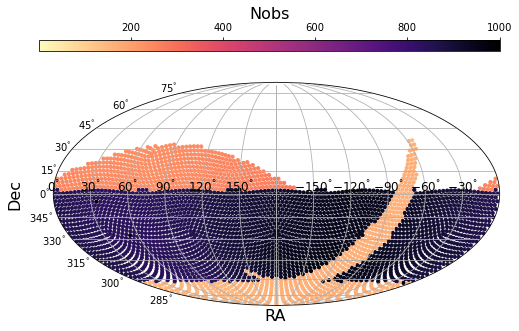

In [27]:
f, ax, data_proj = makeMollweideAxes()

use = np.where(OpS.Nobs > 0)
coords = SkyCoord(OpS.RA[use], OpS.Dec[use], unit=(units.degree, units.degree),frame='icrs')

RAwrap = coords.ra.wrap_at(360.*units.degree).degree
Decwrap = coords.dec.wrap_at(90.*units.degree).degree

mlw = ax.scatter(np.array(RAwrap).ravel(), 
                 np.array(Decwrap).ravel(), 
                 c=OpS.Nobs[use], #probably want this in a given filter, but that takes a long time to gather
                 cmap='magma_r', s = 10, vmin=1, vmax=1000, transform=data_proj)

# Now adding the colorbar
cbaxes = f.add_axes([0.1, 0.9, 0.8, 0.03]) 
cbar = plt.colorbar(mlw, cax = cbaxes, orientation="horizontal") 
cbaxes.xaxis.set_ticks_position('top')
cbaxes.xaxis.set_label_position('top')

#cbar = f.colorbar(mlw, orientation="horizontal")#shrink=0.7)
cbar.set_label(r'Nobs',fontsize=16)

f.savefig('OpSim_baseline_Nobs.pdf', format='pdf', bbox_inches='tight')

In [4]:
COpS = OpSim()
COpS.dbFile = '/Users/ageller/WORK/LSST/onGitHub/EBLSST/input/db/colossus_2664.db'
COpS.getAllOpSimFields()

getting OpSim fields...
have summary cursor.
have field cursor.
returned 5292 fields


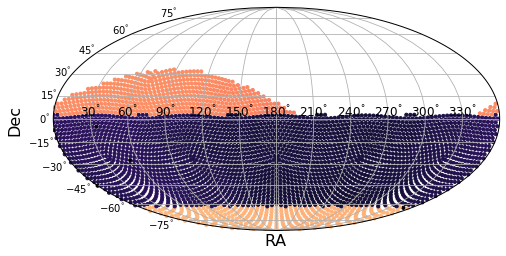

In [13]:
f, ax, data_proj = makeMollweideAxes()

use = np.where(COpS.Nobs > 0)
coords = SkyCoord(COpS.RA[use], COpS.Dec[use], unit=(units.degree, units.degree),frame='icrs')

RAwrap = coords.ra.wrap_at(360.*units.degree).degree
Decwrap = coords.dec.wrap_at(90.*units.degree).degree


mlw = ax.scatter(np.array(RAwrap).ravel(), 
                 np.array(Decwrap).ravel(), 
                 c=COpS.Nobs[use], #probably want this in a given filter, but that takes a long time to gather
                 cmap='magma_r', s = 10, vmin=0, vmax=1000, transform=data_proj)
#cbar = f.colorbar(mlw, shrink=0.7)
#cbar.set_label(r'Nobs')
f.savefig('OpSim_colossus_Nobs.pdf', format='pdf', bbox_inches='tight')

In [6]:
print(len(OpS.Nobs), len(COpS.Nobs))

5292 5292


744.0 -1273.0


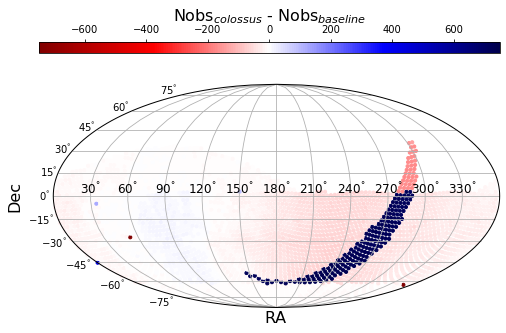

In [14]:
f, ax, data_proj = makeMollweideAxes()

use = np.where(np.logical_or(OpS.Nobs > 0, COpS.Nobs > 0))
print(max(COpS.Nobs[use] - OpS.Nobs[use]), min(COpS.Nobs[use] - OpS.Nobs[use]))

coords = SkyCoord(OpS.RA[use], OpS.Dec[use], unit=(units.degree, units.degree),frame='icrs')

RAwrap = coords.ra.wrap_at(360.*units.degree).degree
Decwrap = coords.dec.wrap_at(90.*units.degree).degree

mlw = ax.scatter(np.array(RAwrap).ravel(), 
                 np.array(Decwrap).ravel(), 
                 c=COpS.Nobs[use] - OpS.Nobs[use], 
                 cmap='seismic_r', s = 10, vmin=-750, vmax=750, transform=data_proj)

# Now adding the colorbar
cbaxes = f.add_axes([0.1, 0.9, 0.8, 0.03]) 
cbar = plt.colorbar(mlw, cax = cbaxes, orientation="horizontal") 
cbaxes.xaxis.set_ticks_position('top')
cbaxes.xaxis.set_label_position('top')

#cbar = f.colorbar(mlw, orientation="horizontal")#shrink=0.7)
cbar.set_label(r'Nobs$_{colossus}$ - Nobs$_{baseline}$',fontsize=16)

f.savefig('OpSim_colossus-minus-baseline_Nobs.pdf', format='pdf', bbox_inches='tight')

In [7]:
OCdfAll = pd.read_csv('/Users/ageller/WORK/LSST/onGitHub/EBLSST/input/clusters/OCcompiled_clean.csv')
OCdf = pd.read_csv('/Users/ageller/WORK/LSST/onGitHub/EBLSST/input/clusters/OCdataForEBLSST.csv')
OCdf

,ID,RA[hr],Dec[deg],dist[pc],rhm[pc],mass[Msun],age[Myr],[Fe/H],sigma_v0_z[km/s],OpSimID,OpSimRA[deg],OpSimDec[deg]
0,[KPR2005]_69,12 06 18.000,-69 46 48.000,887.000000,2.675566,528.634586,62.939789,-0.497417,0.404075,142.0,180.000000,-70.915163
1,[KPR2005]_71,12 20 07.920,-67 30 32.400,1249.120000,1.873323,1423.707265,70.934439,-0.497417,0.792495,219.0,187.051824,-66.571355
2,[KPR2005]_57,10 10 55.000,-66 42 00.000,1491.500000,5.996958,1235.038188,1037.322238,-0.347000,0.412541,228.0,151.825837,-65.928135
3,Cl_Melotte_101,10 42 08.400,-65 06 36.000,2031.100000,3.758378,596.067304,109.328586,-0.497417,0.362026,242.0,159.479611,-65.499798
4,Cl_Loden_995,13 54 18.000,-64 57 00.000,1940.500000,4.502331,2500.198714,267.627292,-0.131000,0.677425,227.0,208.174163,-65.928135
5,IC_2602,10 42 27.120,-64 25 33.600,155.828571,2.129800,733.658212,105.546848,-0.129667,0.533544,242.0,159.479611,-65.499798
6,[KPR2005]_70,12 14 49.000,-64 24 00.000,2676.000000,6.993376,9326.599341,7.968228,-0.497417,1.049810,264.0,186.328963,-63.782148
7,C_1128-631,11 31 05.280,-63 25 33.600,3035.100000,5.028178,7953.793804,10.669542,-0.497417,1.143337,265.0,173.671037,-63.782148
8,NGC_5045,13 14 31.000,-63 25 12.000,1581.000000,6.716593,1698.990309,50.076681,-0.497417,0.457208,292.0,198.517800,-62.802646
9,Cl_Platais_12,13 52 35.000,-63 24 18.000,454.750000,4.799152,2157.813585,224.067217,0.027000,0.609561,288.0,205.386437,-63.321027


In [8]:
GCdf = pd.read_csv('/Users/ageller/WORK/LSST/onGitHub/EBLSST/input/clusters/GCdataForEBLSST.csv')
GCdf

,ID,RA[hr],Dec[deg],dist[pc],rhm[pc],mass[Msun],age[Myr],[Fe/H],sigma_v0_z[km/s],OpSimID,OpSimRA[deg],OpSimDec[deg]
0,NGC 104,00 24 05.67,-72 04 52.6,4500.0,4.149521,1.059327e+06,12343.750000,-0.720000,11.000000,114.0,5.606889,-73.293784
1,NGC 288,00 52 45.24,-26 34 57.4,8900.0,5.773259,9.057952e+04,9757.440476,-1.320000,2.900000,1524.0,14.033108,-25.294617
2,NGC 362,01 03 14.26,-70 50 55.6,8600.0,2.051344,4.256278e+05,9522.321429,-1.260000,6.400000,162.0,19.216740,-70.227766
3,Whiting 1,02 02 57,-03 15 10,30100.0,1.926262,1.741927e+03,11081.821987,-0.700000,0.864470,2508.0,29.637645,-2.836499
4,NGC 1261,03 12 16.21,-55 12 58.4,16300.0,3.224205,2.382484e+05,9287.202381,-1.270000,7.814409,492.0,50.475658,-54.543202
5,Pal 1,03 33 20.04,+79 34 51.8,11100.0,1.485275,1.840899e+03,6465.773810,-0.650000,1.012055,5250.0,55.141667,80.199608
6,AM 1,03 55 02.3,-49 36 55,123300.0,14.705272,1.409386e+04,11081.821987,-1.700000,0.889961,621.0,57.903841,-50.212216
7,Eridanus,04 24 44.5,-21 11 13,90100.0,12.056153,2.037183e+04,11081.821987,-1.430000,1.181689,1714.0,67.408736,-20.535329
8,Pal 2,04 46 05.91,+31 22 53.4,27200.0,3.956080,2.786314e+05,11081.821987,-1.420000,7.629128,4053.0,72.000010,31.829949
9,NGC 1851,05 14 06.76,-40 02 47.6,12100.0,1.795071,3.881772e+05,8816.964286,-1.180000,10.400000,949.0,79.406498,-39.869134


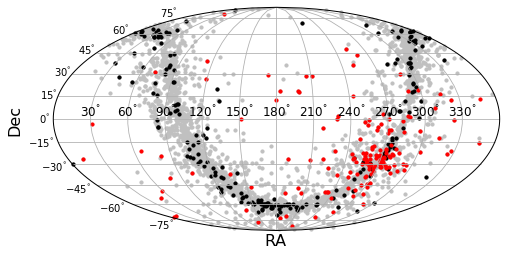

In [10]:
OCcoordsAll = SkyCoord(OCdfAll['RA'], OCdfAll['Dec'], 
                    unit=(units.hourangle, units.degree),frame='icrs')
OCRAwrapAll = OCcoordsAll.ra.wrap_at(360.*units.degree).degree
OCDecwrapAll = OCcoordsAll.dec.wrap_at(90.*units.degree).degree

OCcoords = SkyCoord(OCdf['RA[hr]'], OCdf['Dec[deg]'], 
                    unit=(units.hourangle, units.degree),frame='icrs')
OCRAwrap = OCcoords.ra.wrap_at(360.*units.degree).degree
OCDecwrap = OCcoords.dec.wrap_at(90.*units.degree).degree

GCcoords = SkyCoord(GCdf['RA[hr]'], GCdf['Dec[deg]'], 
                    unit=(units.hourangle, units.degree),frame='icrs')
GCRAwrap = GCcoords.ra.wrap_at(360.*units.degree).degree
GCDecwrap = GCcoords.dec.wrap_at(90.*units.degree).degree




f, ax, data_proj = makeMollweideAxes()

ax.scatter(np.array(OCRAwrapAll).ravel(), 
                 np.array(OCDecwrapAll).ravel(), color='silver', s=10, transform=data_proj)
ax.scatter(np.array(OCRAwrap).ravel(), 
                 np.array(OCDecwrap).ravel(), color='black', s=10, transform=data_proj)
ax.scatter(np.array(GCRAwrap).ravel(), 
                 np.array(GCDecwrap).ravel(), color='red', s=10, transform=data_proj)

f.savefig('cluster_mollweide.pdf', format='pdf', bbox_inches='tight')

